In [14]:
import pandas as pd
import numpy as np

In [2]:
ps = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\position.csv")
ps

,Player,Unnamed: 1,Position
0,Brenden Aaronson,NaN,Attacking Midfield
1,Paxten Aaronson,NaN,Attacking Midfield
2,James Abankwah,NaN,Centre-Back
3,George Abbott,NaN,"['Series([], Name: TmPos, dtype: object)']"
4,Yunis Abdelhamid,NaN,Centre-Back
...,...,...,...
2714,Martin Ødegaard,NaN,Attacking Midfield
2715,Milan Đurić,NaN,Centre-Forward
2716,Filip Đuričić,NaN,Attacking Midfield
2717,Blanco,NaN,Defensive Midfield


In [3]:
ps['Position'] = ps['Position'].str.strip().str.lower()

In [4]:
ps["Position"].value_counts()

centre-back                                   487
central midfield                              365
centre-forward                                359
right-back                                    233
defensive midfield                            212
left-back                                     208
goalkeeper                                    197
right winger                                  189
left winger                                   186
attacking midfield                            179
['series([], name: tmpos, dtype: object)']     47
second striker                                 29
left wingback                                  13
right wingback                                  8
right midfield                                  2
attack                                          2
midfield                                        1
Name: Position, dtype: int64

In [5]:
shooting_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\shooting.csv")
stats_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\stats.csv")
keepersadv_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\keepersadv.csv")
possession_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\possession.csv")
passing_types_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\passing_types.csv")
passing_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\passing.csv")
misc_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\misc.csv")
keepers_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\keepers.csv")
gca_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\gca.csv")
defense_df = pd.read_csv(r"E:\2nd year\3rd sem\Data science\Project\Web scrapping\Final Data\defense.csv")

In [6]:
# Print the columns of each DataFrame
print("Columns of 'shooting_df':", shooting_df.columns)
print("Columns of 'stats_df':", stats_df.columns)
print("Columns of 'keepersadv_df':", keepersadv_df.columns)
print("Columns of 'keepers_df':", keepers_df.columns)
print("Columns of 'possession_df':", possession_df.columns)
print("Columns of 'passing_types_df':", passing_types_df.columns)
print("Columns of 'passing_df':", passing_df.columns)
print("Columns of 'misc_df':", misc_df.columns)
print("Columns of 'gca_df':", gca_df.columns)
print("Columns of 'defense_df':", defense_df.columns)

Columns of 'shooting_df': Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'SGls', 'SSh', 'SSoT', 'SSoTp', 'SSh_p90', 'SSoT_90', 'SG_Sh', 'SG_SoT',
       'SFK', 'SPK', 'SPKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'npG-xG',
       'SDist'],
      dtype='object')
Columns of 'stats_df': Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'GA', 'npg', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'NPxG', 'xAG', 'NPxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_p90', 'Ast_p90', 'GA_p90', 'npg_p90', 'npG+A_p90', 'xG_p90',
       'xAG_p90', 'xG+xAG_p90', 'NPxG_p90', 'NPxG+xAG_p90', 'Unnamed: 37'],
      dtype='object')
Columns of 'keepersadv_df': Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'GA', 'PKA', 'FK', 'CK', 'OG', 'PSxG', 'PSxG/SoT', 'PSxG-GA',
       'PSxG-GA_p90', 'LCmp', 'LAtt', 'LCmp%', 'PaAtt', 'PaThr', 'PaAvgLen',
       'GKAtt', 'GKLp', 

In [7]:
top_charts = misc_df[['Player']]
top_charts = top_charts.merge(stats_df[['Player','Nation','Squad','MP','Min','Gls','Ast','xG','NPxG+xAG','xAG']], on='Player', how='left')
top_charts = top_charts.merge(keepers_df[['Player','Saves','CS' ]], on='Player', how='left')
top_charts = top_charts.merge(keepersadv_df[['Player','CStp', 'SwOPA']], on='Player', how='left')
top_charts = top_charts.merge(misc_df[['Player', 'CrdY', 'CrdR', 'Off','ADWon']], on='Player', how='left')
top_charts = top_charts.merge(shooting_df[['Player','SSh', 'SSoT','SG_SoT']], on='Player', how='left')
top_charts = top_charts.merge(passing_df[['Player','TCmp','LCmpp','LFTP','LCrsPA', 'LPrgP',]], on='Player', how='left')
top_charts = top_charts.merge(gca_df[['Player','SCA','GCA' ]], on='Player', how='left')
top_charts = top_charts.merge(defense_df[['Player','BInt', 'BTklInt', 'BClr','CTkl']], on='Player', how='left')
top_charts = top_charts.merge(possession_df[['Player','TOSucc' ]], on='Player', how='left')
top_charts.replace('#DIV/0!', pd.NA, inplace=True)
top_charts.fillna(0, inplace=True)

top_charts.to_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\Topping_the_charts.csv')
top_charts


,Player,Nation,Squad,MP,Min,Gls,Ast,xG,NPxG+xAG,xAG,...,LFTP,LCrsPA,LPrgP,SCA,GCA,BInt,BTklInt,BClr,CTkl,TOSucc
0,Brenden Aaronson,USA,Leeds United,36,2372,1,3,3.9,8.1,4.2,...,47,4,86,95,7,5,50,6,15,34
1,Paxten Aaronson,USA,Eint Frankfurt,7,173,0,0,0.2,0.2,0.0,...,3,0,6,8,2,0,6,2,2,3
2,James Abankwah,IRL,Udinese,2,63,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,5,0,1
3,George Abbott,ENG,Tottenham,1,1,0,0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
4,Yunis Abdelhamid,MAR,Reims,37,3330,1,2,2.4,3.4,1.0,...,155,0,215,43,7,64,146,116,39,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,Martin Ødegaard,NOR,Arsenal,37,3127,15,7,10.0,18.1,8.1,...,135,4,266,163,17,6,42,12,14,48
5006,Milan Đurić,BIH,Hellas Verona,28,1366,1,1,1.4,2.7,1.3,...,27,0,29,36,2,1,3,24,1,2
5007,Filip Đuričić,SRB,Sampdoria,32,2171,3,0,2.7,4.6,1.9,...,50,4,77,69,3,7,50,8,14,31
5008,Blanco,0,Cádiz,3,158,0,0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
strikers_df.columns

Index(['Player', 'Position', '90s', 'xAG', 'NPxG', 'LPPA', 'LPrgP', 'LKP',
       'LxA', 'LFTP', 'CaCPA', 'Att_Pen', 'Mid_3rd', 'Att_3rd', 'Live',
       'npxG/Sh', 'SSh', 'SSoT', 'SDist', 'ADWon', 'ADWonp', 'Off'],
      dtype='object')

In [34]:
strikers_df = ps[ps["Position"].isin(["centre-forward", "second striker"])][['Player', 'Position']]

strikers_df = strikers_df.merge(stats_df[['Player', '90s', 'xAG', 'NPxG']], on='Player', how='left')
strikers_df = strikers_df.merge(passing_df[['Player', 'LPPA', 'LPrgP', 'LKP', 'LxA', 'LFTP']], on='Player', how='left')
strikers_df = strikers_df.merge(possession_df[['Player', 'CaCPA', 'Att_Pen', 'Mid_3rd', 'Att_3rd', 'Live']], on='Player', how='left')
strikers_df = strikers_df.merge(shooting_df[['Player', 'npxG/Sh', 'SSh', 'SSoT', 'SDist']], on='Player', how='left')
strikers_df = strikers_df.merge(misc_df[['Player', 'ADWon', 'ADWonp', 'Off']], on='Player', how='left')

columns_to_divide_by_90 = ['xAG', 'NPxG', 'LPPA', 'LPrgP', 'LKP',
       'LxA', 'LFTP', 'CaCPA', 'Att_Pen', 'Mid_3rd', 'Att_3rd', 'Live',
       'npxG/Sh', 'SSh', 'SSoT', 'SDist', 'ADWon', 'ADWonp', 'Off']

strikers_df[columns_to_divide_by_90] = strikers_df[columns_to_divide_by_90].div(strikers_df['90s'], axis=0)


strikers_df.replace('#DIV/0!', pd.NA, inplace=True)
strikers_df.fillna(0, inplace=True)


strikers_df.to_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\strikers.csv')
strikers_df

,Player,Position,90s,xAG,NPxG,LPPA,LPrgP,LKP,LxA,LFTP,...,Mid_3rd,Att_3rd,Live,npxG/Sh,SSh,SSoT,SDist,ADWon,ADWonp,Off
0,Matthis Abline,centre-forward,10.20000000,0.09803922,0.27450980,0.39215686,0.98039216,0.68627451,0.04901961,0.78431373,...,11.37254902,12.25490196,24.01960784,0.27450980,2.94117647,0.98039216,-0.07843137,1.27450980,2.71172299,0.58823529
1,Tammy Abraham,centre-forward,24.30000000,0.14814815,0.44444444,0.69958848,2.22222222,1.35802469,0.11522634,0.74074074,...,16.09053498,14.60905350,32.34567901,0.44444444,2.55144033,1.15226337,-0.11522634,3.29218107,2.13777992,0.45267490
2,Che Adams,centre-forward,22.10000000,0.12669683,0.29864253,0.49773756,1.53846154,1.08597285,0.09954751,0.95022624,...,12.94117647,17.05882353,32.44343891,0.29864253,2.12669683,0.63348416,-0.07239819,2.76018100,1.68303719,0.63348416
3,Sargis Adamyan,centre-forward,7.20000000,0.11111111,0.47222222,1.52777778,3.33333333,1.11111111,0.19444444,0.97222222,...,18.61111111,20.41666667,43.05555556,0.47222222,2.91666667,1.52777778,-0.33333333,1.66666667,4.50450450,0.55555556
4,Karim Adeyemi,centre-forward,15.40000000,0.24025974,0.27922078,1.62337662,3.05194805,1.81818182,0.24025974,1.10389610,...,15.58441558,24.93506494,43.83116883,0.27922078,2.40259740,0.90909091,0.11038961,0.64935065,4.63821892,0.06493506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Kelvin Yeboah,centre-forward,3.90000000,0.10256410,0.35897436,0.76923077,1.53846154,1.28205128,0.12820513,1.02564103,...,12.05128205,21.02564103,35.64102564,0.35897436,3.33333333,0.51282051,-0.10256410,3.58974359,9.97150997,0.25641026
384,Duván Zapata,centre-forward,15.40000000,0.07142857,0.25324675,0.90909091,2.59740260,1.10389610,0.07792208,1.23376623,...,16.36363636,20.71428571,38.76623377,0.25324675,2.66233766,0.51948052,-0.12337662,2.72727273,3.20855615,0.45454545
385,Joshua Zirkzee,centre-forward,9.10000000,0.15384615,0.34065934,0.65934066,1.86813187,1.75824176,0.05494505,1.31868132,...,19.45054945,20.32967033,41.64835165,0.34065934,3.18681319,0.87912088,-0.12087912,1.31868132,3.56400356,0.21978022
386,Simon Zoller,centre-forward,16.20000000,0.06790123,0.25308642,0.24691358,1.29629630,0.55555556,0.03086420,0.98765432,...,13.45679012,11.17283951,28.39506173,0.25308642,1.85185185,0.55555556,-0.06790123,0.92592593,2.64550265,0.43209877


In [8]:
gk_df = ps[ps["Position"].isin(["goalkeeper"])]
gk_df = gk_df[['Player', 'Position']]
gk_df = gk_df.merge(keepersadv_df[['Player','90s','PSxG','PSxG/SoT','PSxG-GA', 'LCmp', 'LAtt',  'PaAtt', 'PaThr', 'PaAvgLen','GKAtt',  'GKAvgLen', 'COpp', 'CStp', 'SwOPA']], on='Player', how='left')
gk_df = gk_df.merge(keepers_df[['Player','SoTA', 'Saves', 'Savep', 'CS', 'PKsv']], on='Player', how='left')
gk_df.to_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\gk.csv')
gk_df

,Player,Position,90s,PSxG,PSxG/SoT,PSxG-GA,LCmp,LAtt,PaAtt,PaThr,...,GKAtt,GKAvgLen,COpp,CStp,SwOPA,SoTA,Saves,Savep,CS,PKsv
0,Álvaro Aceves,goalkeeper,0.1,0.1,0.04,0.1,1.0,2.0,7.0,3.0,...,1.0,24.0,1.0,0.0,2.0,3.0,3.0,100.000000,0.0,0.0
1,Julen Agirrezabala,goalkeeper,7.5,5.5,0.30,-0.5,37.0,101.0,179.0,33.0,...,62.0,55.4,96.0,11.0,10.0,19.0,13.0,68.421053,2.0,0.0
2,Doğan Alemdar,goalkeeper,4.5,6.5,0.29,-1.5,23.0,67.0,109.0,14.0,...,35.0,51.4,75.0,5.0,5.0,16.0,7.0,43.750000,1.0,1.0
3,Alisson,goalkeeper,37.0,51.1,0.33,10.1,116.0,283.0,1256.0,210.0,...,193.0,31.3,397.0,23.0,89.0,147.0,105.0,71.428571,14.0,1.0
4,Alphonse Areola,goalkeeper,3.4,7.3,0.33,0.3,14.0,37.0,61.0,14.0,...,30.0,33.0,47.0,2.0,1.0,16.0,9.0,56.250000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Joseph Whitworth,goalkeeper,2.0,2.3,0.23,-2.7,8.0,27.0,68.0,8.0,...,15.0,36.7,25.0,1.0,3.0,10.0,5.0,50.000000,0.0,0.0
193,Robin Zentner,goalkeeper,26.0,35.4,0.30,-3.6,160.0,474.0,672.0,146.0,...,194.0,54.1,321.0,43.0,53.0,109.0,69.0,63.302752,7.0,1.0
194,Michael Zetterer,goalkeeper,1.7,3.2,0.24,0.2,16.0,33.0,49.0,13.0,...,12.0,50.3,15.0,3.0,4.0,14.0,11.0,78.571429,0.0,0.0
195,Jeroen Zoet,goalkeeper,3.7,2.8,0.14,-1.2,25.0,78.0,110.0,13.0,...,23.0,58.4,62.0,4.0,6.0,13.0,9.0,69.230769,0.0,0.0


In [10]:
fb_df = ps[ps["Position"].isin(["left-back","right-back","left wingback","right wingback"])]
fb_df = fb_df[['Player', 'Position']]
fb_df = fb_df.merge(defense_df[['Player','BTklInt','CTkl%']], on='Player', how='left')
fb_df = fb_df.merge(passing_types_df[['Player','PTCrs','PTTB']], on='Player', how='left')
fb_df = fb_df.merge(gca_df[['Player','SCA']], on='Player', how='left')
fb_df = fb_df.merge(passing_df[['Player','LPrgP','LFTP','LxA']], on='Player', how='left')
fb_df = fb_df.merge(possession_df[['Player','CaFTC','CaPrgC','Def_3rd', 'Mid_3rd', 'Att_3rd','Live']], on='Player', how='left')
fb_df = fb_df.merge(stats_df[['Player','90s','PrgR']], on='Player', how='left')
fb_df.replace('#DIV/0!', pd.NA, inplace=True)
fb_df.fillna(0, inplace=True)
fb_df.to_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\fb.csv')
fb_df

,Player,Position,BTklInt,CTkl%,PTCrs,PTTB,SCA,LPrgP,LFTP,LxA,CaFTC,CaPrgC,Def_3rd,Mid_3rd,Att_3rd,Live,90s,PrgR
0,Abner,left-back,20,43.750000,13,0,8,16,18,0.5,7,8,128,189,113,425,6.7,25
1,Marcos Acuña,left-back,80,71.428571,147,3,65,102,71,5.7,43,49,406,670,467,1523,21.2,94
2,Felix Agu,right-back,1,0.000000,1,0,4,2,1,0.1,2,0,7,13,14,33,0.5,2
3,Ruben Aguilar,right-back,37,36.363636,39,0,18,102,72,1.2,23,29,210,463,305,975,13.0,78
4,Ola Aina,right-back,28,60.000000,35,0,27,43,35,1.9,26,35,146,294,250,679,9.7,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Aaron Zehnter,left-back,1,0.000000,0,0,0,0,0,0.0,0,0,1,2,0,3,0.0,0
611,Jordan Zemura,left-back,55,53.488372,18,0,35,45,32,2.1,29,39,302,297,222,808,16.2,48
612,Oleksandr Zinchenko,left-back,62,53.846154,37,6,56,227,201,2.4,66,67,463,1058,610,2112,23.5,68
613,Nadir Zortea,right wingback,29,66.666667,10,1,22,47,26,0.7,26,35,205,280,178,659,9.8,38


In [11]:
am_df = ps[ps["Position"].isin(["attacking midfield"])]
am_df = am_df[['Player', 'Position']]
am_df = am_df.merge(stats_df[['Player','90s']], on='Player', how='left')
am_df = am_df.merge(passing_df[['Player','TCmp', 'LFTP','LPrgP','LPPA','LxA']], on='Player', how='left')
am_df = am_df.merge(possession_df[['Player', 'Def_3rd', 'Mid_3rd', 'Att_3rd', 'Live','TOSucc','CaPrgC','PrgR','CaFTC','CaCPA','Att_Pen']], on='Player', how='left')
am_df = am_df.merge(shooting_df[['Player','SSh','npxG','SDist']], on='Player', how='left')
am_df = am_df.merge(passing_types_df[['Player','PTTB']], on='Player', how='left')
am_df.replace('#DIV/0!', pd.NA, inplace=True)
am_df.fillna(0, inplace=True)
am_df.to_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\am.csv')
am_df

,Player,Position,90s,TCmp,LFTP,LPrgP,LPPA,LxA,Def_3rd,Mid_3rd,...,TOSucc,CaPrgC,PrgR,CaFTC,CaCPA,Att_Pen,SSh,npxG,SDist,PTTB
0,Brenden Aaronson,attacking midfield,26.4,592,47,86,16,2.6,116,495,...,34,43,151,34,13,72,41,3.9,-2.9,8
1,Paxten Aaronson,attacking midfield,1.9,51,3,6,0,0.1,6,41,...,3,8,15,2,2,17,4,0.2,-0.2,0
2,Himad Abdelli,attacking midfield,23.7,1043,124,151,26,2.5,237,914,...,43,58,111,60,7,23,24,1.4,0.6,8
3,Yacine Adli,attacking midfield,1.6,49,6,10,2,0.2,14,45,...,4,7,8,5,0,2,2,0.1,-0.1,0
4,Maghnes Akliouche,attacking midfield,4.5,130,12,16,5,0.5,23,85,...,6,9,42,5,2,17,5,0.5,-0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Nicolò Zaniolo,attacking midfield,9.9,125,10,19,7,0.6,36,153,...,10,34,69,27,10,45,28,2.9,-1.9,3
220,Piotr Zieliński,attacking midfield,25.4,1300,122,128,45,7.5,183,822,...,22,62,129,75,9,54,53,3.5,-0.5,2
221,Hakim Ziyech,attacking midfield,7.3,258,20,42,19,1.5,74,184,...,14,20,69,17,7,17,16,0.6,-0.6,4
222,Martin Ødegaard,attacking midfield,34.7,1449,135,266,91,7.9,199,864,...,48,83,193,60,26,122,93,10.0,5.0,23


In [12]:
dm_df = ps[ps["Position"].isin(["defensive midfield"])]
dm_df = dm_df[['Player', 'Position']]
dm_df = dm_df.merge(stats_df[['Player','90s']], on='Player', how='left')
dm_df = dm_df.merge(passing_df[['Player','TCmp', 'LFTP','LPrgP']], on='Player', how='left')
dm_df = dm_df.merge(possession_df[['Player', 'Def_3rd', 'Mid_3rd', 'Att_3rd', 'Live','TOSucc','CaPrgC','PrgR',]], on='Player', how='left')
dm_df = dm_df.merge(defense_df[['Player','BTklInt','CTkl%','BClr']], on='Player', how='left')
dm_df = dm_df.merge(misc_df[['Player','ADWon', 'ADWonp']], on='Player', how='left')
dm_df.replace('#DIV/0!', pd.NA, inplace=True)
dm_df.fillna(0, inplace=True)
dm_df.to_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\dm.csv')
dm_df

,Player,Position,90s,TCmp,LFTP,LPrgP,Def_3rd,Mid_3rd,Att_3rd,Live,TOSucc,CaPrgC,PrgR,BTklInt,CTkl%,BClr,ADWon,ADWonp
0,Salis Abdul Samed,defensive midfield,32.2,1819,182,165,404,1502,340,2224,29,33,44,82,55.769231,26,14,45.161290
1,Laurent Abergel,defensive midfield,26.0,1308,144,143,581,1069,151,1779,23,13,14,126,42.391304,39,8,34.782609
2,Oliver Abildgaard,defensive midfield,6.6,115,17,15,82,137,40,257,1,2,8,15,43.750000,17,50,70.422535
3,Tyler Adams,defensive midfield,24.0,1108,110,136,376,1010,254,1628,7,19,20,124,64.935065,29,25,62.500000
4,Lucien Agoume,defensive midfield,12.2,619,62,93,276,480,143,893,5,9,10,69,51.515152,24,31,63.265306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Denis Zakaria,defensive midfield,6.0,190,10,9,80,142,53,269,5,11,3,20,20.000000,11,0,0.000000
301,Andre-Frank Zambo Anguissa,defensive midfield,33.9,1988,185,181,408,1519,758,2647,33,58,140,102,25.000000,25,47,63.513514
302,Martín Zubimendi,defensive midfield,34.5,1545,175,184,509,1350,259,2090,9,43,29,96,53.333333,55,58,63.043478
303,Blanco,defensive midfield,1.8,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0.000000


In [17]:
cm_df = ps[ps["Position"].isin(["central midfield"])]
cm_df = cm_df[['Player', 'Position']]
cm_df = cm_df.merge(stats_df[['Player','90s']], on='Player', how='left')
cm_df = cm_df.merge(passing_df[['Player','TCmp', 'LFTP','LPrgP']], on='Player', how='left')
cm_df = cm_df.merge(possession_df[['Player', 'Def_3rd', 'Mid_3rd', 'Att_3rd', 'Live','TOSucc','CaPrgC','PrgR','TOAtt']], on='Player', how='left')
cm_df = cm_df.merge(defense_df[['Player','BTklInt']], on='Player', how='left')
cm_df = cm_df.merge(passing_types_df[['Player','PTTB']], on='Player', how='left')
cm_df.replace('#DIV/0!', pd.NA, inplace=True)
cm_df.fillna(0, inplace=True)
cm_df.to_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\cm.csv')
cm_df

,Player,Position,90s,TCmp,LFTP,LPrgP,Def_3rd,Mid_3rd,Att_3rd,Live,TOSucc,CaPrgC,PrgR,TOAtt,BTklInt,PTTB
0,Christian Acella,central midfield,0.2,9,0,0,1,9,1,11,0,0,0,0,1,0
1,Mohamed Achi,central midfield,0.4,18,1,3,4,11,10,25,0,2,1,1,1,0
2,Martin Adeline,central midfield,1.2,29,2,3,22,22,16,59,1,1,1,3,6,0
3,Michel Aebischer,central midfield,17.1,557,37,46,147,400,246,791,6,14,85,13,19,0
4,Álvaro Aguado,central midfield,21.0,930,111,139,255,742,315,1292,13,29,50,31,40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Xeka,central midfield,6.1,279,32,39,74,248,61,380,1,5,13,6,16,1
443,Ryan Yates,central midfield,20.4,455,26,43,235,418,143,790,4,11,27,9,48,0
444,Oier Zarraga,central midfield,9.5,294,36,37,60,229,168,447,5,12,32,7,24,1
445,Szymon Żurkowski,central midfield,5.1,87,10,11,46,88,62,194,8,12,14,12,13,0


In [14]:
cb_df = ps[ps["Position"].isin(["centre-back"])][['Player', 'Position']]
cb_df = cb_df.merge(defense_df[['Player', 'BTklInt', 'CTkl', 'BClr', 'BSh', 'BPass']], on='Player', how='left')
cb_df = cb_df.merge(passing_df[['Player', 'TCmp', 'LCmp', 'LAtt', 'LPrgP', 'LFTP']], on='Player', how='left')
cb_df = cb_df.merge(possession_df[['Player', 'CaPrgC', 'Def_3rd', 'Mid_3rd', 'Att_3rd', 'Live']], on='Player', how='left')
cb_df = cb_df.merge(stats_df[['Player', 'PrgC', 'PrgP','90s']], on='Player', how='left')
cb_df = cb_df.merge(misc_df[['Player', 'ADWonp', 'ADWon']], on='Player', how='left')

cb_df.replace('#DIV/0!', pd.NA, inplace=True)
cb_df.fillna(0, inplace=True)
cb_df.to_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\cb.csv')
cb_df

,Player,Position,BTklInt,CTkl,BClr,BSh,BPass,TCmp,LCmp,LAtt,...,CaPrgC,Def_3rd,Mid_3rd,Att_3rd,Live,PrgC,PrgP,90s,ADWonp,ADWon
0,James Abankwah,centre-back,1,0,5,2,2,23,2,5,...,0,26,13,0,39,0,0,0.7,100.000000,2
1,Yunis Abdelhamid,centre-back,146,39,116,27,38,1679,155,279,...,40,1088,1275,123,2459,40,215,37.0,64.583333,93
2,Francesco Acerbi,centre-back,74,20,85,18,7,1455,149,202,...,39,858,880,167,1890,39,100,26.9,65.000000,78
3,Tosin Adarabioyo,centre-back,56,16,140,15,5,1066,136,223,...,16,776,732,46,1544,16,95,23.2,69.411765,59
4,Emmanuel Agbadou,centre-back,103,42,107,14,16,1281,202,284,...,15,851,877,87,1798,15,131,26.5,62.500000,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Dan-Axel Zagadou,centre-back,35,5,81,16,3,841,124,171,...,3,631,497,28,1150,3,44,14.1,72.602740,53
545,Nathan Zeze,centre-back,3,1,1,0,0,18,1,2,...,0,15,15,0,30,0,0,0.7,50.000000,1
546,David Zima,centre-back,18,3,11,2,5,154,12,20,...,3,114,121,12,245,3,12,4.5,62.500000,15
547,Kurt Zouma,centre-back,39,5,120,14,3,701,79,129,...,3,654,364,35,1050,3,31,22.1,80.882353,55


In [16]:
wi_df = ps[ps["Position"].isin(["left winger","right winger"])]
wi_df = wi_df[['Player', 'Position']]
wi_df = wi_df.merge(passing_types_df[['Player','PTCrs','PTTB']], on='Player', how='left')
wi_df = wi_df.merge(passing_df[['Player','LxA','LKP', 'LFTP',  'LPPA','LPrgP']], on='Player', how='left')
wi_df = wi_df.merge(possession_df[['Player', 'Att_Pen','TOAtt', 'TOSucc', 'CaPrgC','CaCPA',]], on='Player', how='left')
wi_df = wi_df.merge(stats_df[['Player','PrgR','90s']], on='Player', how='left')
wi_df = wi_df.merge(shooting_df[['Player','npxG', 'npxG/Sh','SSh_p90', 'SSoT_90']], on='Player', how='left')
wi_df = wi_df.merge(misc_df[['Player','Off']], on='Player', how='left') 
wi_df.replace('#DIV/0!', pd.NA, inplace=True)
wi_df.fillna(0, inplace=True)
wi_df.to_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\wi.csv')
wi_df

,Player,Position,PTCrs,PTTB,LxA,LKP,LFTP,LPPA,LPrgP,Att_Pen,...,TOSucc,CaPrgC,CaCPA,PrgR,90s,npxG,npxG/Sh,SSh_p90,SSoT_90,Off
0,Zakaria Aboukhlal,right winger,29,1,2.8,22,30,22,72,151,...,42,100,44,276,27.5,11.5,11.5,3.018182,1.090909,20
1,Amine Adli,right winger,18,3,1.9,20,26,10,49,67,...,26,46,15,137,15.9,5.0,5.0,2.327044,1.069182,4
2,Kevin Agudelo,right winger,34,5,2.6,28,58,31,110,54,...,50,81,19,100,23.7,1.5,1.5,1.181435,0.295359,2
3,Amar Ahmed,left winger,0,0,0.0,0,0,0,1,0,...,1,0,0,2,0.2,0.0,0.0,0.000000,0.000000,0
4,Ángel Alarcón,left winger,1,0,0.0,0,0,0,0,0,...,0,0,0,0,0.3,0.0,0.0,3.333333,3.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Nicola Zalewski,left winger,76,2,1.9,12,58,24,85,33,...,29,92,21,99,24.4,1.3,1.3,1.188525,0.368852,1
586,Luca Zanimacchia,right winger,46,0,1.0,14,12,12,26,33,...,5,22,8,70,8.3,1.2,1.2,2.289157,0.481928,2
587,Arber Zeneli,left winger,50,4,2.3,22,24,19,51,56,...,17,45,29,118,11.1,2.1,2.1,2.792793,0.540541,3
588,Alessio Zerbin,left winger,1,0,0.1,0,3,1,6,9,...,2,5,3,20,2.2,0.3,0.3,2.272727,1.363636,1


In [4]:
import json
import pandas as pd
from copy import deepcopy
from bs4 import BeautifulSoup
from urllib.request import urlopen
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import streamlit as st

def create_full_pitch(x_lims, y_lims, background_color="#0E1117", line_color="white", line_width=10.):
    x_mid = x_lims[1] / 2
    y_mid = y_lims[1] / 2

    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")
    return ax

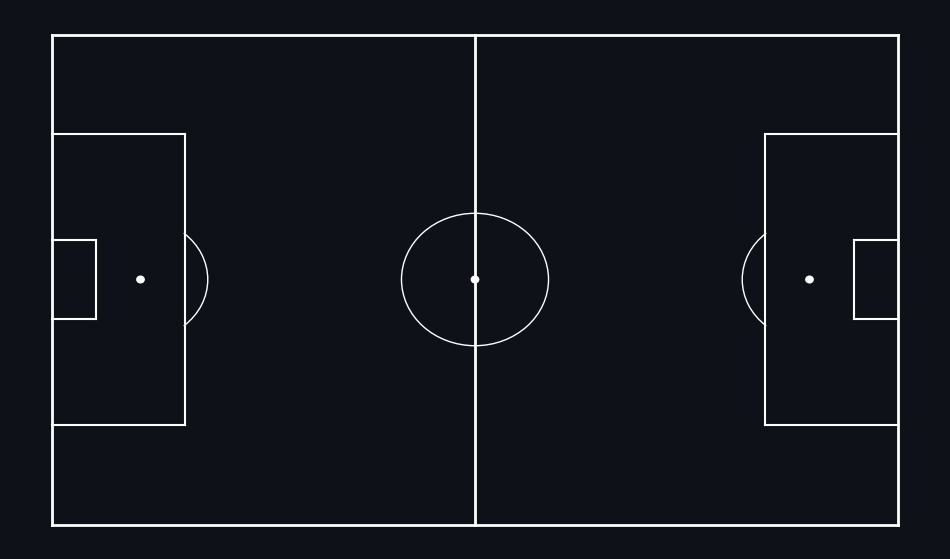

In [5]:

pitch_width = 105  
pitch_length = 68  
background_color = "#0E1117"  
line_color = "white"  
line_width = 2.0  

# Create the pitch visualization
ax = create_full_pitch(x_lims=[0, 1.15], y_lims=[0, 0.74], background_color=background_color, line_color=line_color, line_width=line_width)

# Show the pitch using Matplotlib
plt.show()
